<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_active_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------------+-----------------------------------+--------------+------------+-----------+
| Stage          | Parameters                        | Snake Info   | Mean       | Std Dev   |
+================+===================================+==============+============+===========+
| Blurred Image  | sigma=2                           | -            | Mean=0.39  | Std=0.12  |
+----------------+-----------------------------------+--------------+------------+-----------+
| Active Contour | alpha=0.015, beta=10, gamma=0.001 | Points=400   | Mean=98.16 | Std=31.01 |
+----------------+-----------------------------------+--------------+------------+-----------+


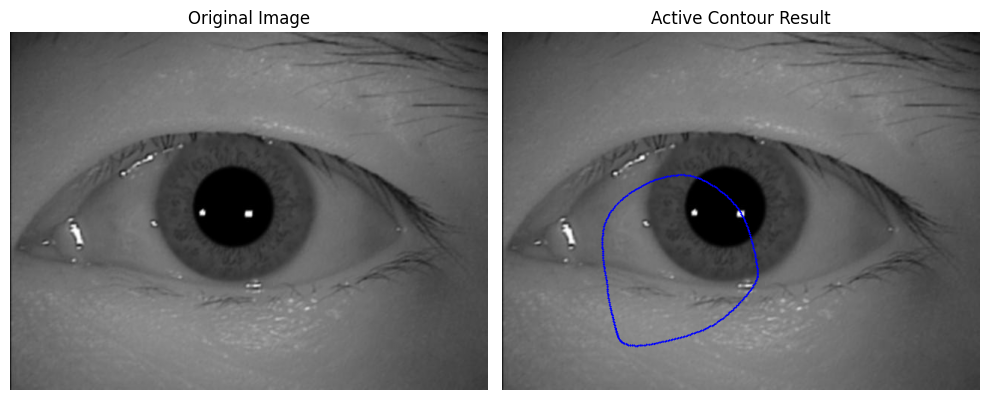

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from tabulate import tabulate

def apply_active_contour_segmentation(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Preprocessing: Gaussian smoothing
    blur_sigma = 2
    blurred = gaussian(image, sigma=blur_sigma)

    # Generate initial snake - a circle around the center of the image
    s = np.linspace(0, 2*np.pi, 400)
    r = image.shape[0] // 2
    c = image.shape[1] // 2
    radius = min(r, c) // 2
    init = np.array([r + radius * np.sin(s), c + radius * np.cos(s)]).T

    # Apply active contour model
    snake = active_contour(blurred, init, alpha=0.015, beta=10, gamma=0.001)

    # Draw the snake on original image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    snake_int = np.array(snake, dtype=np.int32)
    for point in snake_int:
        cv2.circle(image_rgb, tuple(point), 1, (0, 0, 255), -1)

    # Metrics
    table_data = [
        ["Blurred Image", f"sigma={blur_sigma}", "-", f"Mean={np.mean(blurred):.2f}", f"Std={np.std(blurred):.2f}"],
        ["Active Contour", "alpha=0.015, beta=10, gamma=0.001", f"Points={len(snake)}", f"Mean={np.mean(image_rgb):.2f}", f"Std={np.std(image_rgb):.2f}"],
    ]
    headers = ["Stage", "Parameters", "Snake Info", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_rgb)
    plt.title("Active Contour Result")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_active_contour_segmentation("/content/S6000S00.jpg")
